# Part 2: The Pyplot Interface - Intermediate Visualization

In Part 1, we learned the basics of creating plots with Matplotlib using data from files. Now, we'll explore the pyplot interface in more depth, learning how to create more complex and customized visualizations.

## The Pyplot Interface

The pyplot interface is designed to be similar to MATLAB's plotting functions, making it easier for MATLAB users to transition to Python. It provides a state-based interface to the underlying object-oriented plotting library. The state-based interface keeps track of the current figure and plotting area, and plotting functions are directed to the current axes.

In [1]:
import matplotlib.pyplot as plt
import math  # We'll use the math module for some calculations

# Configure Matplotlib to display plots inline in the Jupyter Notebook
%matplotlib inline

## Creating Additional Data Files

Let's create some additional data files for our more advanced visualizations:

In [2]:
# Create a file with trigonometric data
with open('trig_data.txt', 'w') as file:
    file.write("x,sin_x,cos_x\n")  # Header row
    
    # Generate data points from 0 to 2π
    for i in range(100):
        x = i * 2 * math.pi / 99  # 100 points from 0 to 2π
        sin_x = math.sin(x)
        cos_x = math.cos(x)
        file.write(f"{x},{sin_x},{cos_x}\n")
        
# Create a file with data for a bar chart with error bars
with open('data_with_errors.txt', 'w') as file:
    file.write("Category,Value,Error\n")  # Header row
    
    # Sample data with error margins
    categories = ['A', 'B', 'C', 'D', 'E']
    values = [25, 32, 21, 35, 29]
    errors = [2, 3, 2, 4, 3]
    
    for category, value, error in zip(categories, values, errors):
        file.write(f"{category},{value},{error}\n")
        
# Create a file with pie chart data
with open('pie_data.txt', 'w') as file:
    file.write("Category,Value\n")  # Header row
    
    # Sample data for pie chart
    categories = ['Category A', 'Category B', 'Category C', 'Category D', 'Category E']
    values = [35, 25, 20, 10, 10]
    
    for category, value in zip(categories, values):
        file.write(f"{category},{value}\n")
        
# Create a file with histogram data
with open('histogram_data.txt', 'w') as file:
    file.write("Value\n")  # Header row
    
    # Generate a bell-shaped distribution of data using Box-Muller transform
    for i in range(1000):
        # Use the Box-Muller transform to generate normally distributed data
        u1 = (i + 0.5) / 1000  # A value between 0 and 1
        u2 = ((i * 17) % 1000 + 0.5) / 1000  # Another pseudorandom value between 0 and 1
        
        # Box-Muller transform
        z = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
        
        # Adjust the mean and standard deviation
        value = 0 + 1 * z  # mean=0, std=1
        
        file.write(f"{value}\n")

print("Additional data files created successfully!")

Additional data files created successfully!


## Customizing Line Plots

Let's create a more sophisticated line plot with customized line styles, colors, and markers using our trigonometric data:

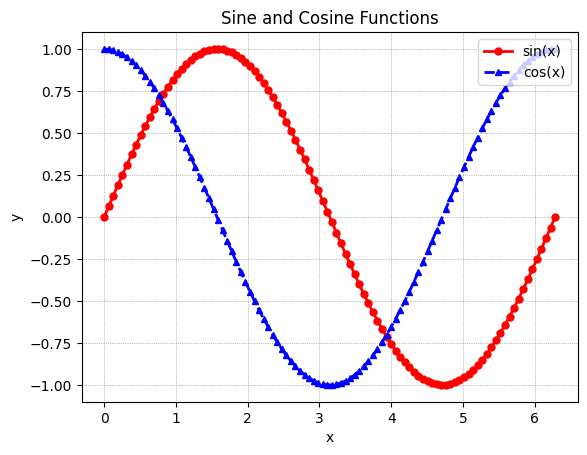

In [3]:
# Read the trigonometric data from the file
x_values = []
sin_values = []
cos_values = []

with open('trig_data.txt', 'r') as file:
    next(file)  # Skip header line
    for line in file:
        x, sin_x, cos_x = line.strip().split(',')
        x_values.append(float(x))
        sin_values.append(float(sin_x))
        cos_values.append(float(cos_x))

# Create a customized line plot
plt.plot(x_values, sin_values, color='red', linestyle='-', linewidth=2, marker='o', markersize=5, label='sin(x)')
plt.plot(x_values, cos_values, color='blue', linestyle='--', linewidth=2, marker='^', markersize=5, label='cos(x)')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine and Cosine Functions')

# Add a grid
plt.grid(True, color='gray', linestyle=':', linewidth=0.5)

# Add a legend
plt.legend(loc='upper right')

# Display the plot
plt.show()

### Key Customization Parameters

1. **Line Properties:**
   - `color` or `c`: Sets the color of the line or marker
   - `linestyle` or `ls`: Sets the style of the line (e.g., solid, dashed, dotted)
   - `linewidth` or `lw`: Sets the width of the line
   - `marker`: Sets the style of the markers (e.g., circle, square, diamond)
   - `markersize` or `ms`: Sets the size of the markers

2. **Axis Labels and Title:**
   - `fontsize`: Sets the font size
   - `fontweight`: Sets the font weight (e.g., 'normal', 'bold')
   - `color`: Sets the color of the text

3. **Legend:**
   - `loc`: Sets the location of the legend (e.g., 'upper right', 'lower left')
   - `fontsize`: Sets the font size of the legend text
   - `frameon`: If True, draws a frame around the legend
   
4. **Grid:**
   - `color`: Sets the color of the grid lines
   - `linestyle`: Sets the style of the grid lines
   - `linewidth`: Sets the width of the grid lines

## Multiple Plots in One Figure

You can create multiple plots in the same figure using `plt.subplot()`. This function divides the figure into a grid of subplots and creates axes for each one. Let's use our trigonometric data to create multiple subplots:

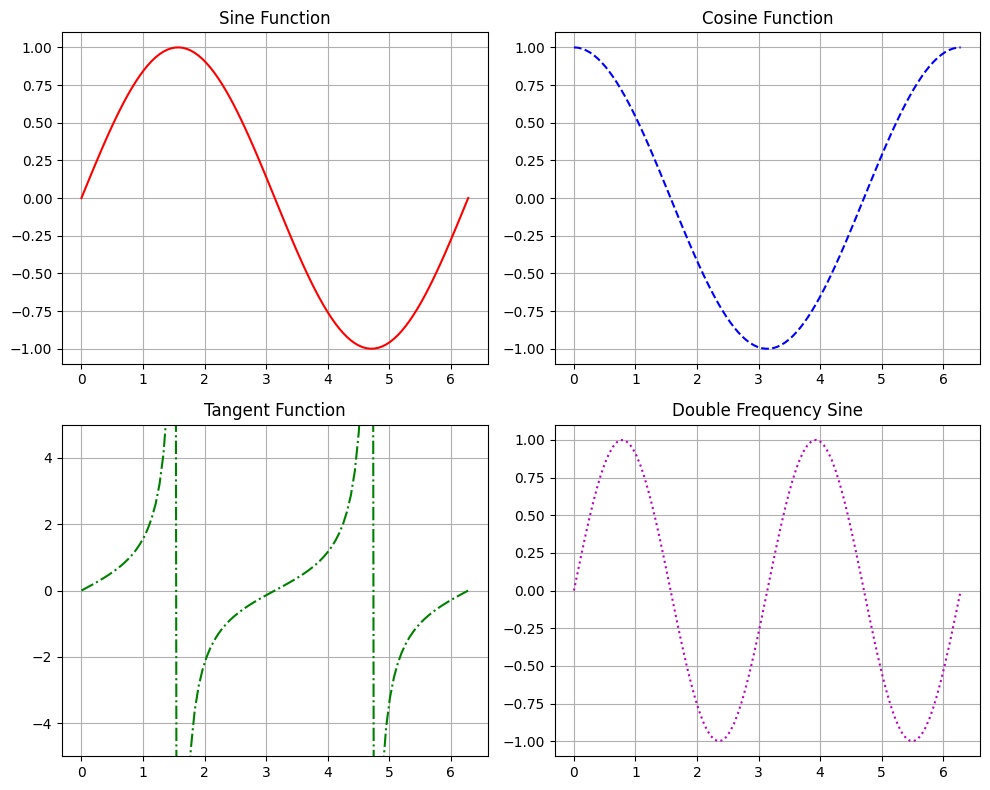

In [4]:
# Calculate additional data from our trigonometric data
tan_values = []
double_sin_values = []

for i in range(len(x_values)):
    # Calculate tan(x), but avoid division by zero
    if abs(cos_values[i]) > 0.01:  # Avoid very small values of cos(x)
        tan_values.append(sin_values[i] / cos_values[i])
    else:
        tan_values.append(float('nan'))  # Not a number for undefined values
    
    # Calculate sin(2x)
    double_sin_values.append(math.sin(2 * x_values[i]))

# Create a figure with 2x2 subplots
plt.figure(figsize=(10, 8))  # Set the figure size (width, height) in inches

# First subplot
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
plt.plot(x_values, sin_values, 'r-')
plt.title('Sine Function')
plt.grid(True)

# Second subplot
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
plt.plot(x_values, cos_values, 'b--')
plt.title('Cosine Function')
plt.grid(True)

# Third subplot
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
plt.plot(x_values, tan_values, 'g-.')
plt.title('Tangent Function')
plt.ylim(-5, 5)  # Limit y-axis to keep the plot readable
plt.grid(True)

# Fourth subplot
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
plt.plot(x_values, double_sin_values, 'm:')
plt.title('Double Frequency Sine')
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

## Customizing Axis Limits and Ticks

You can customize the ranges of the x and y axes, as well as the tick marks along those axes:

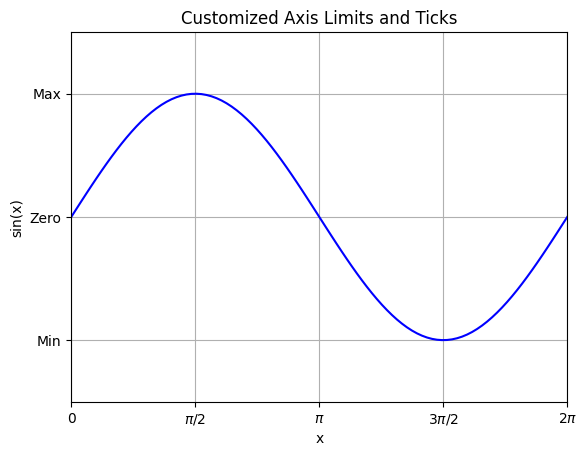

In [5]:
# Create a plot using the sine data
plt.plot(x_values, sin_values, 'b-')

# Set axis limits
plt.xlim(0, 2 * math.pi)     # Set x-axis limits
plt.ylim(-1.5, 1.5)        # Set y-axis limits

# Set custom x-ticks at multiples of π
plt.xticks([0, math.pi/2, math.pi, 3*math.pi/2, 2*math.pi], 
           ['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])

# Set custom y-ticks
plt.yticks([-1, 0, 1], ['Min', 'Zero', 'Max'])

# Add labels and title
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Customized Axis Limits and Ticks')

# Add a grid
plt.grid(True)

# Display the plot
plt.show()

## Creating Different Types of Plots

Matplotlib supports many different types of plots. Let's explore a few more types:

### Bar Chart with Error Bars

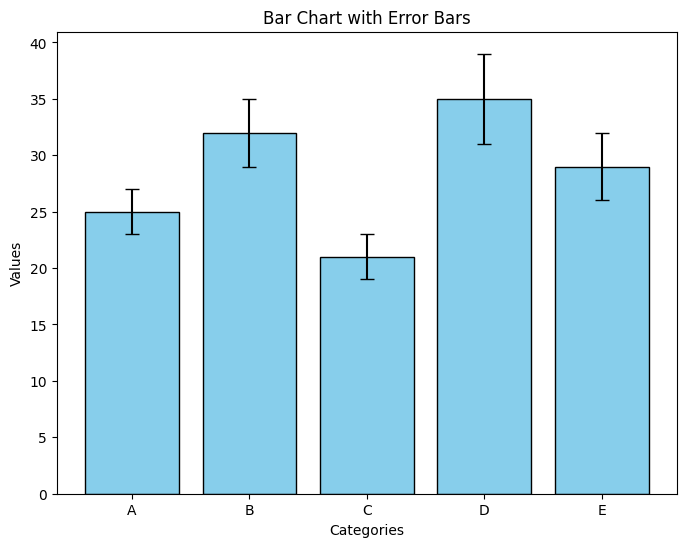

In [6]:
# Read data for bar chart with error bars
categories = []
values = []
errors = []

with open('data_with_errors.txt', 'r') as file:
    next(file)  # Skip header line
    for line in file:
        category, value, error = line.strip().split(',')
        categories.append(category)
        values.append(float(value))
        errors.append(float(error))

# Create a bar chart with error bars
plt.figure(figsize=(8, 6))
plt.bar(categories, values, yerr=errors, capsize=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart with Error Bars')

# Display the plot
plt.show()

### Horizontal Bar Chart

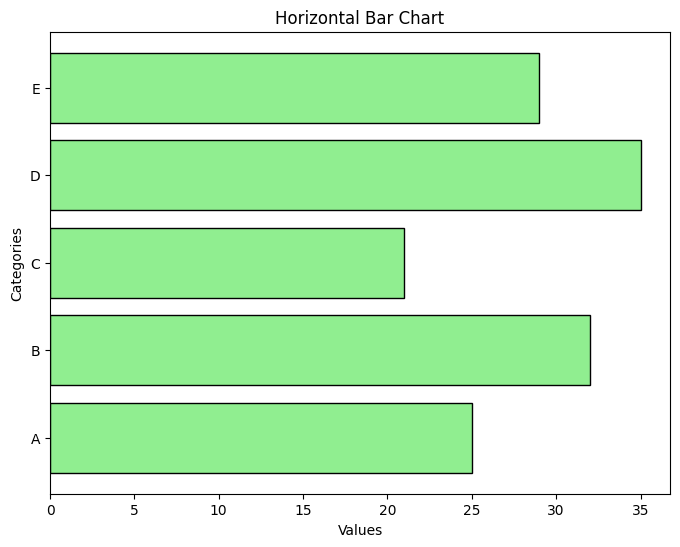

In [7]:
# Create a horizontal bar chart using the same data
plt.figure(figsize=(8, 6))
plt.barh(categories, values, color='lightgreen', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Categories')
plt.title('Horizontal Bar Chart')

# Display the plot
plt.show()

### Pie Chart

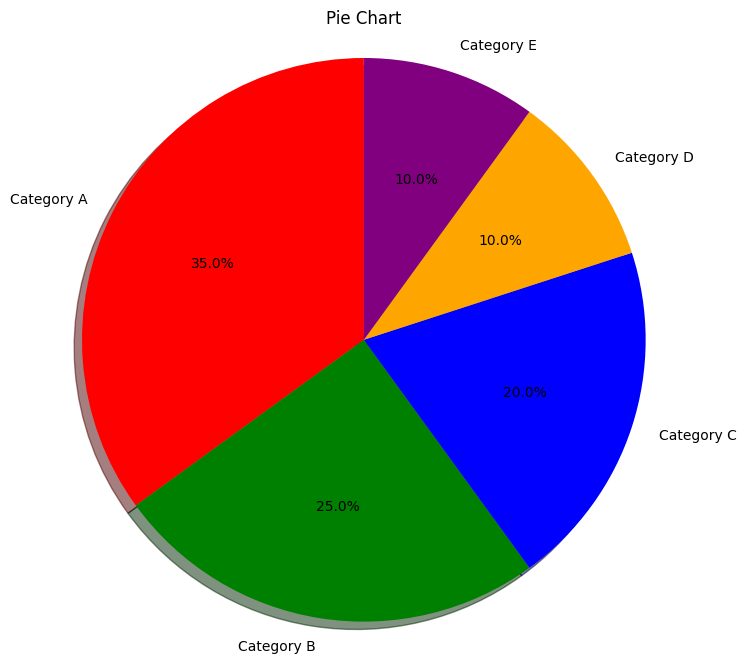

In [8]:
# Read data for pie chart
pie_categories = []
pie_values = []

with open('pie_data.txt', 'r') as file:
    next(file)  # Skip header line
    for line in file:
        category, value = line.strip().split(',')
        pie_categories.append(category)
        pie_values.append(float(value))

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_values, labels=pie_categories, autopct='%1.1f%%', startangle=90, shadow=True,
        colors=['red', 'green', 'blue', 'orange', 'purple'])

# Add a title
plt.title('Pie Chart')

# Ensure the pie chart is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

### Histogram

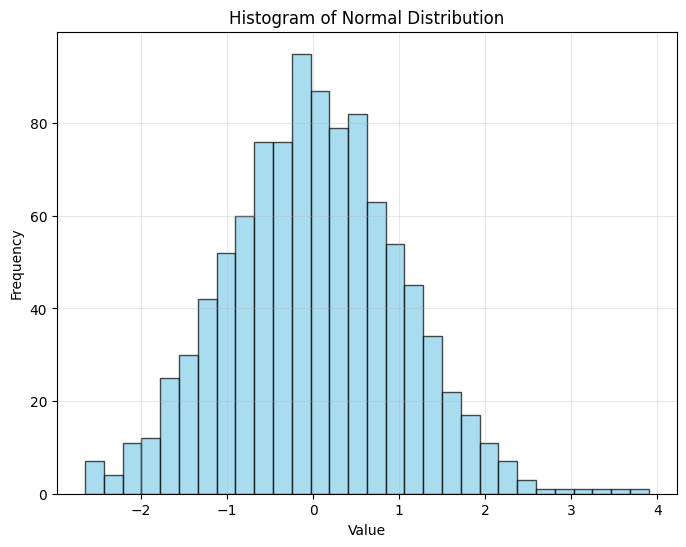

In [9]:
# Read data for histogram
histogram_values = []

with open('histogram_data.txt', 'r') as file:
    next(file)  # Skip header line
    for line in file:
        value = line.strip()
        if value:  # Skip empty lines
            histogram_values.append(float(value))

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(histogram_values, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Normal Distribution')

# Add a grid
plt.grid(True, alpha=0.3)

# Display the plot
plt.show()

## Saving Plots

You can save your plots to various file formats using the `plt.savefig()` function.

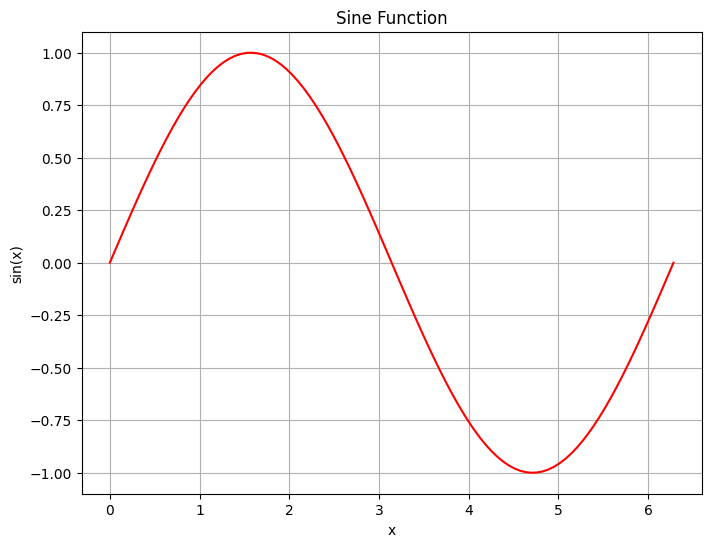

In [10]:
# Create a plot using the sine data
plt.figure(figsize=(8, 6))
plt.plot(x_values, sin_values, 'r-')
plt.title('Sine Function')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid(True)

# Save the plot to different file formats
plt.savefig('sine_plot.png', dpi=300)  # PNG format with 300 DPI
plt.savefig('sine_plot.pdf')           # PDF format
plt.savefig('sine_plot.svg')           # SVG format

# Display the plot
plt.show()

## Exercise: Create a Customized Multi-Plot Figure

Now it's your turn! Create a figure with two subplots side by side:
1. On the left, create a scatter plot using the data from 'scatter_data.txt' with customized markers and colors.
2. On the right, create a bar chart from 'sales_data.txt' with custom colors and labels.

Feel free to customize these plots as much as you like!

In [11]:
# Read the scatter data from the file
scatter_x = []
scatter_y = []

with open('scatter_data.txt', 'r') as file:
    next(file)  # Skip header line
    for line in file:
        x, y = line.strip().split(',')
        scatter_x.append(float(x))
        scatter_y.append(float(y))

# Read the sales data from the file
sales_categories = []
sales_values = []

with open('sales_data.txt', 'r') as file:
    next(file)  # Skip header line
    for line in file:
        category, value = line.strip().split(',')
        sales_categories.append(category)
        sales_values.append(float(value))

# Create your figure with subplots here
# ...

# Don't forget to add labels, titles, and customize your plots
# ...

# Display your figure
# ...

FileNotFoundError: [Errno 2] No such file or directory: 'scatter_data.txt'

## Summary

In this section, we've explored the pyplot interface of Matplotlib in more depth, learning how to:

- Customize line plots with different styles, colors, and markers
- Create multiple subplots in a single figure
- Customize axis limits and ticks
- Create different types of plots: bar charts, horizontal bar charts, pie charts, and histograms
- Save plots to different file formats

In the next part, we'll explore the object-oriented approach to Matplotlib, which offers even more flexibility and control over your visualizations using data from files.